In [89]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as td
import torchvision as tv
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import nntools as nt

import pdb
import collections
from pathlib import Path
import json
from matplotlib import patches, patheffects
import ctoolbox

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


# 1. Load database

In [ ]:
root_dir = '/datasets/ee285f-public/PascalVOC2012/JPEGImages/'

In [67]:
class PascalVocDataset(td.Dataset):
    def __init__(self, root_dir, mode='train'):
        super(PascalVocDataset, self).__init__()
        self.root_dir = root_dir
        self.mode = mode
        self.dict= json.load( (Path().absolute()/('pascal_%s2012.json'%mode)).open())      
        # id :  bbox/class id  
        annotation=collections.defaultdict(lambda:[])
        for o in self.dict['annotations']:
            if not o['ignore']:
                bb = o['bbox']
#                 bb = hw_bb(bb)
                annotation[o['image_id']].append((bb,o['category_id']))
        self.anno = annotation
        #class 
        self.class_dict = {o['id']:o['name'] for o in self.dict['categories']}
        
    def __len__(self):
        return len(self.dict['images'])
    
    def __repr__(self):
        return "PascalVocDataset(mode={})".format(self.mode)
    
    def __getitem__(self, idx):
        fname = self.dict['images'][idx]['file_name']
        img_id = self.dict['images'][idx]['id']
        #pdb.set_trace()        
        img_path = os.path.join(self.root_dir, fname)
        x = Image.open(img_path).convert('RGB')        
        anno = self.anno[img_id]   
        return x,anno
    def getclass(self,idx):
        return self.class_dict[idx]
        

## 2. Draw image and bbox 

<IPython.core.display.Javascript object>


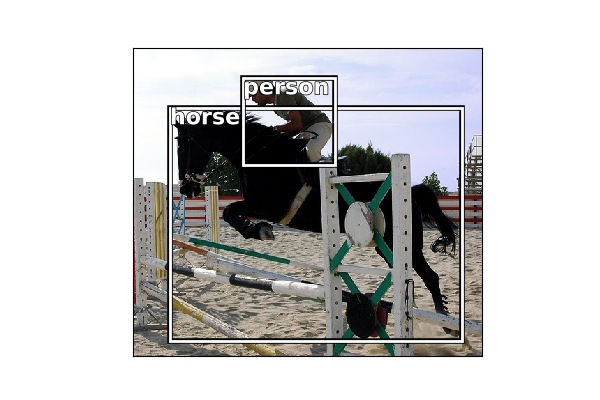

In [90]:
train_set= PascalVocDataset(root_dir)
x, anno= train_set[0]
draw_image(x,anno,figsize=(6,4))

## 3. Largest Item classifier

In [161]:
b = trn_anno[trn_ids[0]]

In [172]:
def get_lrg(b):
    if not b:
        raise Exception('trn_anno contain empty entries,can be solved by redefine trn_anno')
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [173]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}